In [100]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.impute import KNNImputer

### Basic EDA

In [2]:
df = pd.read_csv("XYZ_sports_dataset.csv", sep=";")
df.head()

,ID,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,...,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout
0,10000,60,Female,5500.0,2019-09-03,2019-10-31,2019-07-01,2019-12-31,2019-10-30,1,...,0.0,9.0,7,NaN,6.28,2,0,0.0,0,0
1,10001,29,Female,2630.0,2014-08-12,2015-09-14,2015-01-01,2015-12-31,2015-07-16,60,...,0.0,23.0,1,2.0,17.42,1,2,0.0,0,1
2,10002,23,Male,1980.0,2017-05-02,2017-06-01,2017-01-01,2017-06-30,2017-05-25,7,...,0.0,6.0,0,7.0,30.03,6,0,0.0,0,1
3,10003,9,Male,0.0,2018-09-05,2019-02-12,2018-07-01,2019-06-30,2019-01-21,22,...,0.0,20.0,2,2.0,17.72,3,0,0.0,0,1
4,10004,35,Male,4320.0,2016-04-20,2018-06-07,2018-01-01,2018-06-30,2017-11-09,210,...,NaN,41.0,0,7.0,60.97,0,3,0.0,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14942 entries, 0 to 14941
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          14942 non-null  int64  
 1   Age                         14942 non-null  int64  
 2   Gender                      14942 non-null  object 
 3   Income                      14447 non-null  float64
 4   EnrollmentStart             14942 non-null  object 
 5   EnrollmentFinish            14942 non-null  object 
 6   LastPeriodStart             14942 non-null  object 
 7   LastPeriodFinish            14942 non-null  object 
 8   DateLastVisit               14942 non-null  object 
 9   DaysWithoutFrequency        14942 non-null  int64  
 10  LifetimeValue               14942 non-null  float64
 11  UseByTime                   14942 non-null  int64  
 12  AthleticsActivities         14906 non-null  float64
 13  WaterActivities             149

In [4]:
df.describe()

,ID,Age,Income,DaysWithoutFrequency,LifetimeValue,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,DanceActivities,...,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout
count,14942.000000,14942.000000,14447.000000,14942.000000,14942.000000,14942.000000,14906.00000,14905.000000,14907.000000,14906.0,...,14907.000000,14916.000000,14942.000000,14407.000000,14942.000000,14942.000000,14942.000000,14930.000000,14942.000000,14942.000000
mean,17470.500000,26.015794,2230.816086,81.224936,302.561871,0.047116,0.00738,0.296209,0.576038,0.0,...,0.001878,40.120542,10.152456,5.759561,41.636299,5.320707,1.205260,0.019893,0.022286,0.800964
std,4313.528196,14.156582,1566.527734,144.199576,364.319566,0.211893,0.08559,0.456600,0.494201,0.0,...,0.043300,65.466459,29.154202,2.118867,21.066166,6.332958,1.381305,0.139637,0.166777,0.399289
min,10000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,...,0.000000,1.000000,0.000000,1.000000,0.560000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13735.250000,19.000000,1470.000000,13.000000,83.600000,0.000000,0.00000,0.000000,0.000000,0.0,...,0.000000,7.000000,0.000000,4.000000,25.720000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,17470.500000,23.000000,1990.000000,41.000000,166.200000,0.000000,0.00000,0.000000,1.000000,0.0,...,0.000000,18.000000,0.000000,7.000000,38.990000,4.000000,1.000000,0.000000,0.000000,1.000000
75%,21205.750000,31.000000,2790.000000,83.750000,355.075000,0.000000,0.00000,1.000000,1.000000,0.0,...,0.000000,45.000000,3.000000,7.000000,60.970000,7.000000,2.000000,0.000000,0.000000,1.000000
max,24941.000000,87.000000,10890.000000,1745.000000,6727.800000,1.000000,1.00000,1.000000,1.000000,0.0,...,1.000000,1031.000000,581.000000,7.000000,240.030000,84.000000,6.000000,1.000000,3.000000,1.000000


In [5]:
df.nunique()

ID                            14942
Age                              88
Gender                            2
Income                          737
EnrollmentStart                1490
EnrollmentFinish               1300
LastPeriodStart                  12
LastPeriodFinish                 11
DateLastVisit                  1384
DaysWithoutFrequency            660
LifetimeValue                  5668
UseByTime                         2
AthleticsActivities               2
WaterActivities                   2
FitnessActivities                 2
DanceActivities                   1
TeamActivities                    2
RacketActivities                  2
CombatActivities                  2
NatureActivities                  1
SpecialActivities                 2
OtherActivities                   2
NumberOfFrequencies             415
AttendedClasses                 230
AllowedWeeklyVisitsBySLA          7
AllowedNumberOfVisitsBySLA      270
RealNumberOfVisits               60
NumberOfRenewals            

In [9]:
# remove since only one value, useless columns
df.drop(columns = ['DanceActivities', 'NatureActivities'], inplace = True)

In [10]:
# keep all binary columns separately
binary_columns = ['Gender', 'UseByTime',
       'AthleticsActivities', 'WaterActivities', 'FitnessActivities','TeamActivities', 'RacketActivities',
       'CombatActivities', 'SpecialActivities', 'OtherActivities', 'HasReferences']



### Preprocessing

#### Activities columns

In [12]:
activities = ['AthleticsActivities', 'WaterActivities','FitnessActivities', 'TeamActivities','RacketActivities', 'CombatActivities', 'SpecialActivities', 'OtherActivities']
df['NumberActivities'] = df[activities].sum(axis=1)


#### Timestamp columns

We can process date columns to create important features that will reflect loyalty of customers and their behaviour patterns

In [21]:
df.columns

Index(['ID', 'Age', 'Gender', 'Income', 'EnrollmentStart', 'EnrollmentFinish',
       'LastPeriodStart', 'LastPeriodFinish', 'DateLastVisit',
       'DaysWithoutFrequency', 'LifetimeValue', 'UseByTime',
       'AthleticsActivities', 'WaterActivities', 'FitnessActivities',
       'TeamActivities', 'RacketActivities', 'CombatActivities',
       'SpecialActivities', 'OtherActivities', 'NumberOfFrequencies',
       'AttendedClasses', 'AllowedWeeklyVisitsBySLA',
       'AllowedNumberOfVisitsBySLA', 'RealNumberOfVisits', 'NumberOfRenewals',
       'HasReferences', 'NumberOfReferences', 'Dropout', 'NumberActivities',
       'EnrollmentStartYear', 'EnrollmentDuration', 'LastPeriodDuration'],
      dtype='object')

In [22]:
df['EnrollmentStart'] = pd.to_datetime(df['EnrollmentStart'])
df['EnrollmentFinish'] = pd.to_datetime(df['EnrollmentFinish'])
df['LastPeriodStart'] = pd.to_datetime(df['LastPeriodStart'])
df['LastPeriodFinish'] = pd.to_datetime(df['LastPeriodFinish'])
df['DateLastVisit'] = pd.to_datetime(df['DateLastVisit'])

In [23]:
df['EnrollmentStartYear'] = df['EnrollmentStart'].dt.year

In [24]:
df['EnrollmentDuration'] = (df['EnrollmentFinish'] - df['EnrollmentStart']).dt.days
df['LastPeriodDuration'] = (df['LastPeriodFinish'] - df['LastPeriodStart']).dt.days

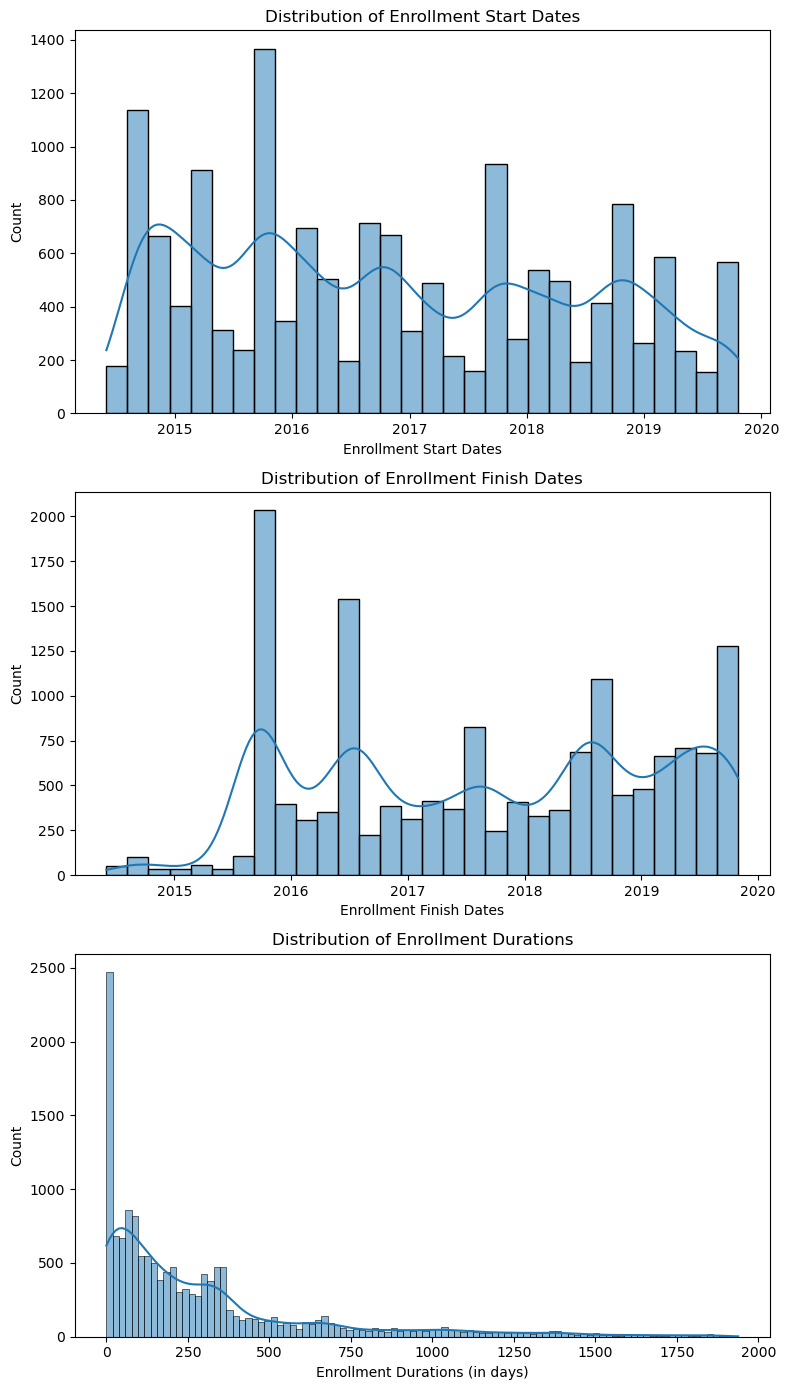

In [25]:
# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(8, 14))

# Plot the distribution of 'EnrollmentStart' dates
sns.histplot(df['EnrollmentStart'], bins=30, kde=True, label='Enrollment Start', ax=axes[0])
axes[0].set_title('Distribution of Enrollment Start Dates')
axes[0].set_xlabel('Enrollment Start Dates')
axes[0].set_ylabel('Count')

# Plot the distribution of 'EnrollmentFinish' dates
sns.histplot(df['EnrollmentFinish'], bins=30, kde=True, label='Enrollment Finish', ax=axes[1])
axes[1].set_title('Distribution of Enrollment Finish Dates')
axes[1].set_xlabel('Enrollment Finish Dates')
axes[1].set_ylabel('Count')


sns.histplot(df['EnrollmentDuration'], bins=100, kde=True, ax=axes[2])
axes[2].set_title('Distribution of Enrollment Durations')
axes[2].set_xlabel('Enrollment Durations (in days)')
axes[2].set_ylabel('Count')
plt.tight_layout()
plt.show()

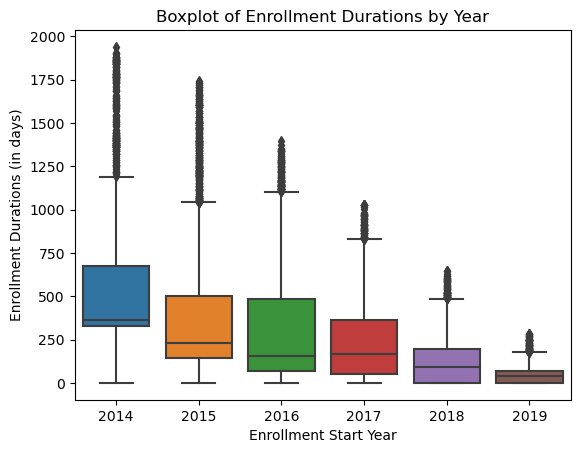

In [26]:
# Boxplot with KDE
sns.boxplot(data=df, x='EnrollmentStartYear', y='EnrollmentDuration', showfliers=True)  # Set showfliers=False to exclude outliers
# sns.stripplot(data=df, x='EnrollmentStartYear', y='EnrollmentDuration', color='black', alpha=0.5, jitter=0.2)  # Add strip plot for individual data points
plt.title('Boxplot of Enrollment Durations by Year')
plt.xlabel('Enrollment Start Year')
plt.ylabel('Enrollment Durations (in days)')
plt.show()

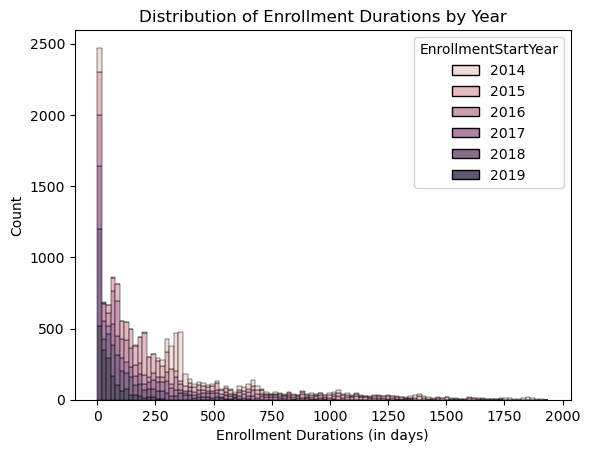

In [27]:
sns.histplot(data=df, x='EnrollmentDuration', bins=100,  hue='EnrollmentStartYear', multiple='stack')
plt.title('Distribution of Enrollment Durations by Year')
plt.xlabel('Enrollment Durations (in days)')
plt.ylabel('Count')
plt.show()

In [28]:
df[df['EnrollmentDuration'] == 0]

,ID,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,...,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout,NumberActivities,EnrollmentStartYear,EnrollmentDuration,LastPeriodDuration
25,10025,13,Female,0.0,2015-09-09,2015-09-09,2019-07-01,2019-12-31,2019-10-26,5,...,6.28,3,4,0.0,0,0,1.0,2015,0,183
36,10036,13,Female,0.0,2014-10-02,2014-10-02,2019-07-01,2019-12-31,2019-10-22,9,...,17.14,5,5,1.0,1,0,3.0,2014,0,183
38,10038,38,Female,1910.0,2018-09-29,2018-09-29,2019-07-01,2019-12-31,2019-10-30,1,...,26.13,25,1,0.0,0,0,1.0,2018,0,183
49,10049,56,Male,6540.0,2018-09-03,2018-09-03,2019-07-01,2019-12-31,2019-10-29,2,...,60.97,32,1,0.0,0,0,1.0,2018,0,183
51,10051,12,Female,0.0,2018-08-17,2018-08-17,2019-07-01,2019-12-31,2019-10-28,3,...,34.84,4,2,0.0,0,0,2.0,2018,0,183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14918,24918,73,Male,3870.0,2014-12-10,2014-12-10,2019-07-01,2019-12-31,2019-10-31,0,...,60.97,45,5,0.0,0,0,2.0,2014,0,183
14919,24919,1,Female,0.0,2019-07-18,2019-07-18,2019-07-01,2019-12-31,2019-10-31,0,...,17.14,7,1,0.0,0,0,1.0,2019,0,183
14926,24926,24,Female,3290.0,2018-10-08,2018-10-08,2019-01-01,2019-12-31,2019-10-29,2,...,17.42,7,1,0.0,0,0,1.0,2018,0,364
14937,24937,14,Male,0.0,2016-09-08,2016-09-08,2019-07-01,2019-12-31,2019-10-29,2,...,34.84,8,3,0.0,0,0,1.0,2016,0,183


We can see that there are a lot of customers having enrollment start and finish as a same date, but their last visit is bigger date, so we can use this date is better approximation of the end of enrollment since we dobt have better data

In [29]:
df.loc[df['EnrollmentDuration'] == 0, 'EnrollmentFinish'] = df.loc[df['EnrollmentDuration'] == 0, 'DateLastVisit']
# recalculate enrollemnt duration 
df['EnrollmentDuration'] = (df['EnrollmentFinish'] - df['EnrollmentStart']).dt.days

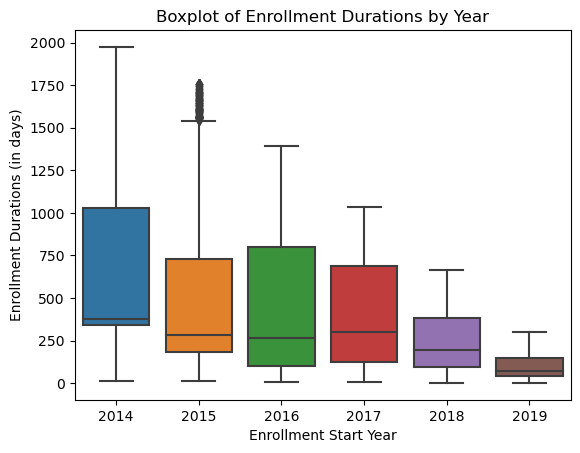

In [30]:
# Boxplot with KDE
sns.boxplot(data=df, x='EnrollmentStartYear', y='EnrollmentDuration', showfliers=True)  # Set showfliers=False to exclude outliers
# sns.stripplot(data=df, x='EnrollmentStartYear', y='EnrollmentDuration', color='black', alpha=0.5, jitter=0.2)  # Add strip plot for individual data points
plt.title('Boxplot of Enrollment Durations by Year')
plt.xlabel('Enrollment Start Year')
plt.ylabel('Enrollment Durations (in days)')
plt.show()

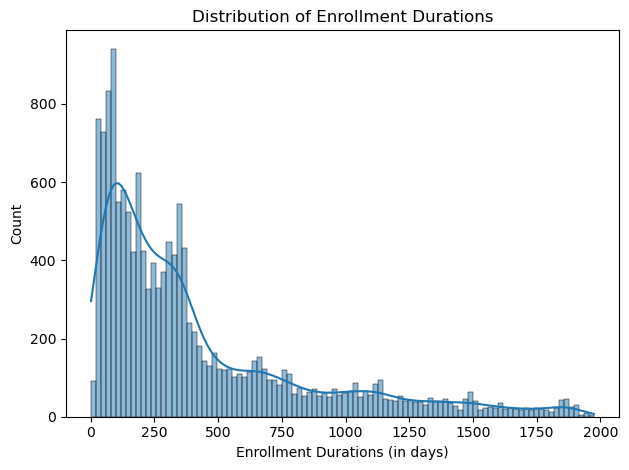

In [31]:
sns.histplot(df['EnrollmentDuration'], bins=100, kde=True)
plt.title('Distribution of Enrollment Durations')
plt.xlabel('Enrollment Durations (in days)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

What we see from this beautiful distributions is that boxes with bigger year has distributions closer to 0 - that makes sense because elder clients had higher chance of staying for a long time and newer clients have just enrolled. However, we still have potential to attract some of these people back if they stop visiting our club. 

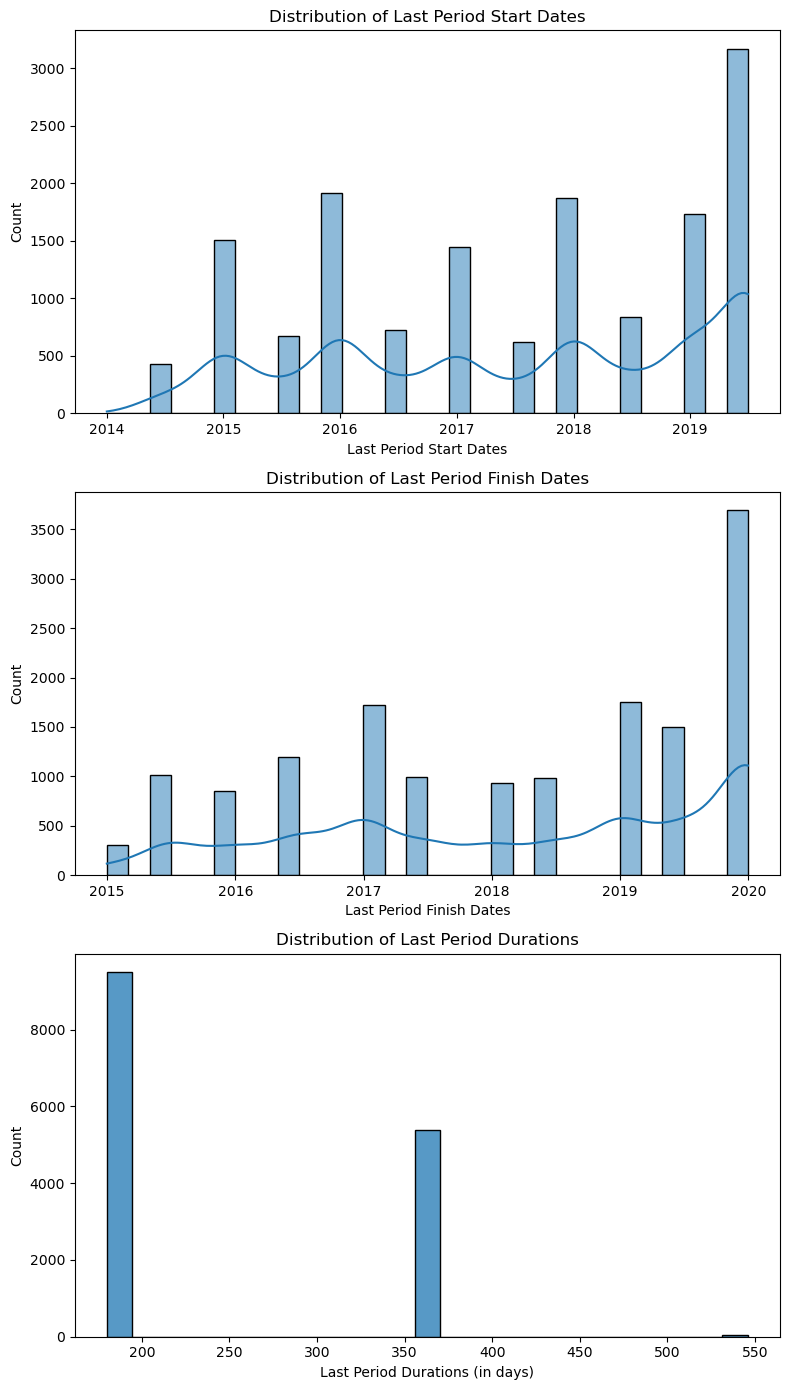

In [32]:
# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(8, 14))

# Plot the distribution of 'EnrollmentStart' dates
sns.histplot(df['LastPeriodStart'], bins=30, kde=True, label='Last Period Start', ax=axes[0])
axes[0].set_title('Distribution of Last Period Start Dates')
axes[0].set_xlabel('Last Period Start Dates')
axes[0].set_ylabel('Count')

# Plot the distribution of 'EnrollmentFinish' dates
sns.histplot(df['LastPeriodFinish'], bins=30, kde=True, label='Last Period Finish', ax=axes[1])
axes[1].set_title('Distribution of Last Period Finish Dates')
axes[1].set_xlabel('Last Period Finish Dates')
axes[1].set_ylabel('Count')


sns.histplot(df['LastPeriodDuration'],   ax=axes[2])
axes[2].set_title('Distribution of Last Period Durations')
axes[2].set_xlabel('Last Period Durations (in days)')
axes[2].set_ylabel('Count')
plt.tight_layout()
plt.show()

In [36]:
df[df['DateLastVisit'] > df['LastPeriodFinish']]

,ID,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,...,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout,NumberActivities,EnrollmentStartYear,EnrollmentDuration,LastPeriodDuration,Recency
23,10023,24,Male,1710.0,2016-10-13,2019-10-31,2018-01-01,2018-12-31,2019-10-25,6,...,11,3,0.0,0,1,1.0,2016,1113,364,6
98,10098,35,Male,6490.0,2015-09-14,2016-07-08,2016-01-01,2016-06-30,2016-07-08,0,...,4,0,0.0,0,1,1.0,2015,298,181,1210
223,10223,51,Male,5640.0,2014-09-10,2019-09-20,2017-01-01,2017-12-31,2019-09-20,41,...,3,5,0.0,0,0,1.0,2014,1836,364,41
236,10236,19,Female,1190.0,2019-02-28,2019-10-30,2019-01-01,2019-06-30,2019-10-30,1,...,12,1,0.0,0,0,1.0,2019,244,180,1
279,10279,3,Female,0.0,2018-01-15,2019-10-23,2018-01-01,2018-12-31,2019-10-23,8,...,1,2,0.0,0,0,1.0,2018,646,364,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14404,24404,8,Female,0.0,2018-09-22,2019-10-19,2019-01-01,2019-06-30,2019-10-19,12,...,6,1,0.0,0,0,1.0,2018,392,180,12
14437,24437,21,Male,2210.0,2019-02-13,2019-10-30,2019-01-01,2019-06-30,2019-10-30,1,...,12,1,0.0,0,0,1.0,2019,259,180,1
14576,24576,22,Female,1950.0,2016-09-20,2019-10-30,2019-01-01,2019-06-30,2019-10-30,1,...,18,3,0.0,0,0,1.0,2016,1135,180,1
14613,24613,23,Female,1520.0,2016-09-14,2019-10-30,2019-01-01,2019-06-30,2019-10-30,1,...,6,3,0.0,0,0,1.0,2016,1141,180,1


it seems like this variable is not useful since it only represents 0.5, 1 or 1,5 years and most of people are in two first groups

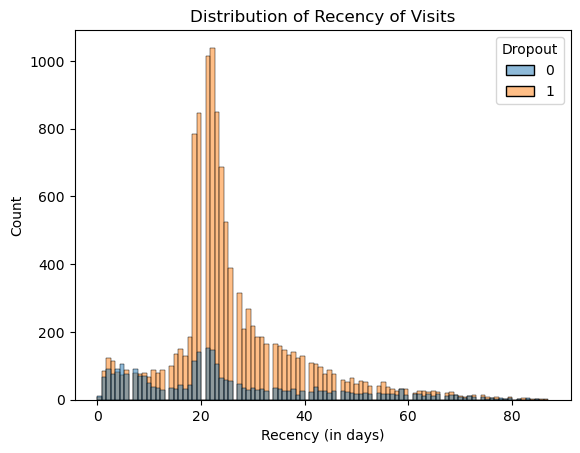

In [33]:
#creating recency variable that represents difference between last visit and biggest date of last visit in dataset

df['Recency'] = (df['DateLastVisit'].max() - df['DateLastVisit']).dt.days

sns.histplot(data=df, x='Age', bins=100, hue = 'Dropout')
plt.title('Distribution of Recency of Visits')
plt.xlabel('Recency (in days)')
plt.ylabel('Count')
plt.show()

A lot of people in data have recent visits, which means that are still active customers and probably we will spend less money on promotions for them

#### Other metric columns

In [23]:
df.drop(columns = binary_columns ).nunique()

ID                            14942
Age                              88
Income                          737
EnrollmentStart                1490
EnrollmentFinish                874
LastPeriodStart                  12
LastPeriodFinish                 11
DateLastVisit                  1384
DaysWithoutFrequency            660
LifetimeValue                  5668
NumberOfFrequencies             415
AttendedClasses                 230
AllowedWeeklyVisitsBySLA          7
AllowedNumberOfVisitsBySLA      270
RealNumberOfVisits               60
NumberOfRenewals                  7
NumberOfReferences                4
Dropout                           2
NumberActivities                  6
EnrollmentStartYear               6
EnrollmentDuration             1717
LastPeriodDuration                6
Recency                        1384
dtype: int64

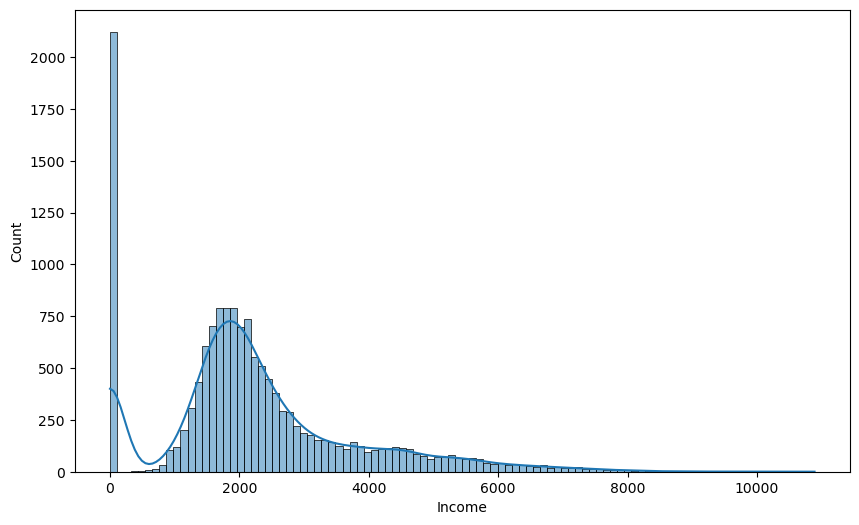

In [24]:
i = 'Income'
plt.figure(figsize=(10, 6))
sns.histplot(df[i], bins=100, kde=True)
plt.show()

seems like a lot of people has 0 income that might mean that these people dont work - tey are teen agers or students

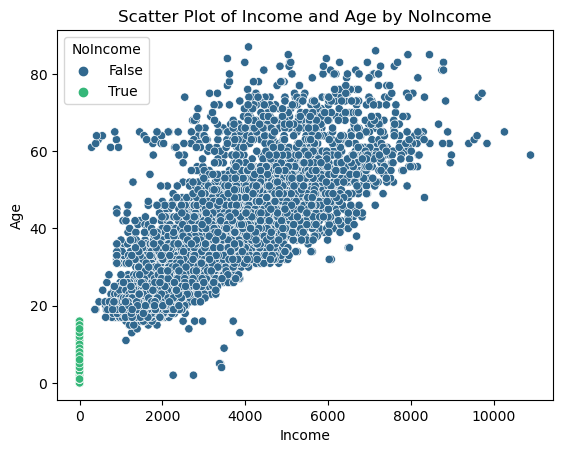

In [25]:
df['NoIncome'] = df['Income'] == 0
sns.scatterplot(data=df, x='Income', y='Age', hue='NoIncome', palette='viridis')
plt.title('Scatter Plot of Income and Age by NoIncome')
plt.show()

In [26]:
i = 'NumberOfReferences'
df[i].value_counts()

0    14646
1      267
2       21
3        8
Name: NumberOfReferences, dtype: int64

Almost all people did 0 or 1 reference, so this column doesnt seem important and will not help with clustering

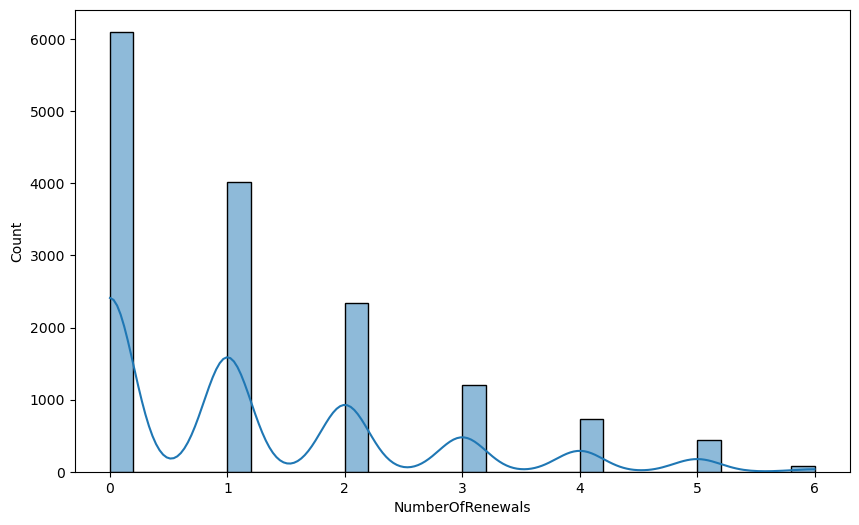

In [233]:
i = 'NumberOfRenewals'
plt.figure(figsize=(10, 6))
sns.histplot(df[i], bins=30, kde=True)
plt.show()

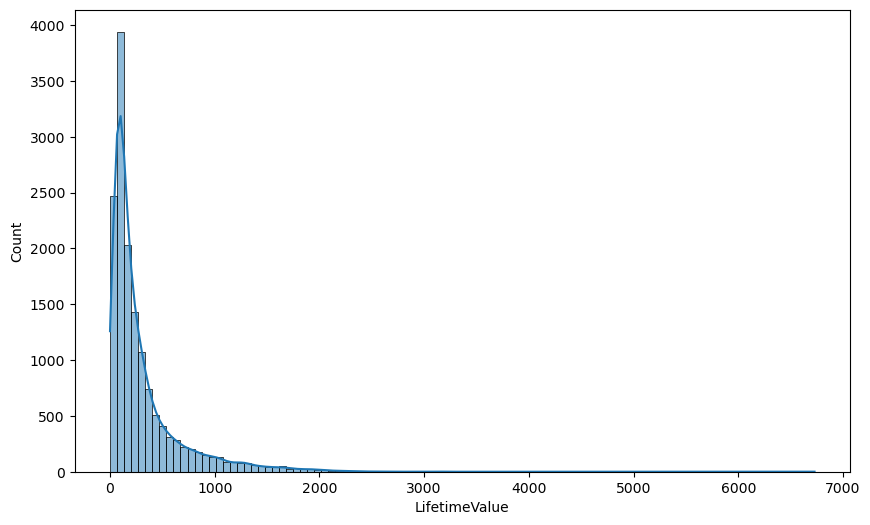

In [27]:
i = 'LifetimeValue'
plt.figure(figsize=(10, 6))
sns.histplot(df[i], bins=100, kde=True)
plt.show()

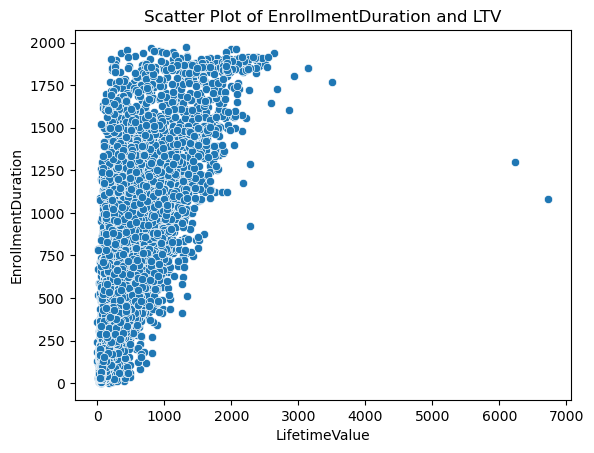

In [28]:
sns.scatterplot(data=df, x='LifetimeValue', y='EnrollmentDuration')
plt.title('Scatter Plot of EnrollmentDuration and LTV')
plt.show()

We see that there is correllation - the longer the person is client, the more money he spent. It makes sense. But for us it might be useful to see if there are people who spend more money not only in total but by unit of time.

#### Cost of the day

In [168]:
# we need to fill missing values in AllowedWeeklyVisitsBySLA since this column is better representation of allowed 
# number of visits than AllowedNumberOfVisitsBySLA which is very noisy - however ше can help fill missing values in weekly sla
X = df[['AllowedWeeklyVisitsBySLA', 'AllowedNumberOfVisitsBySLA']]
imputer = KNNImputer(n_neighbors=100) 
X_imputed = imputer.fit_transform(X)
df['AllowedWeeklyVisitsBySLA'] = np.round(X_imputed[:, 0])

In [169]:
# We know enrollement duration and LTV of customer, so we can approximate his Cost of the day as
# LTV/EnrollmentDuration
# Also we can multiple this number by sla converted to the part of period allowed to visit 
# To make it efficient cost of the day - since 7day and 2 day tarrifs definetely cost different money
df['AllowedWeeklyVisitsBySLA'].value_counts()

7.0    10830
2.0     2378
4.0      769
1.0      554
3.0      248
6.0      133
5.0       30
Name: AllowedWeeklyVisitsBySLA, dtype: int64

In [170]:
sla_part_period = df['AllowedWeeklyVisitsBySLA']/7

df['CostOfDay'] = df['LifetimeValue']/(df['EnrollmentDuration']*sla_part_period)

Median: [0.9174354895722869]
Q1: [0.5582291585388962]
Q3: [1.803030303030303]
Whisker Low: [0.5582291585388962]
Whisker High: [3.669883040935673]


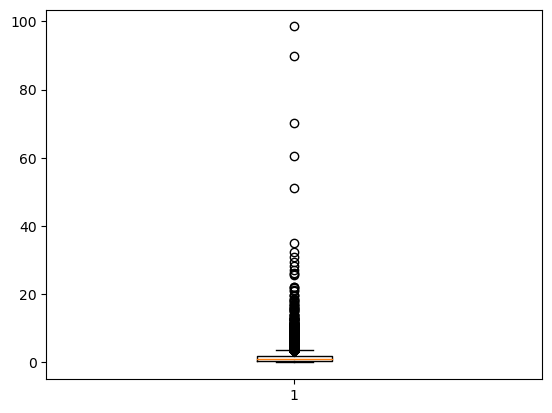

In [171]:
i = 'CostOfDay'
boxplot_dict = plt.boxplot(df[i])

medians = [median.get_ydata()[0] for median in boxplot_dict['medians']]
q1s = [q1.get_ydata()[0] for q1 in boxplot_dict['boxes']]
q3s = [q3.get_ydata()[2] for q3 in boxplot_dict['boxes']]
whisker_low = [whiskers.get_ydata()[0] for whiskers in boxplot_dict['whiskers'][::2]]
whisker_high = [whiskers.get_ydata()[1] for whiskers in boxplot_dict['whiskers'][1::2]]
print("Median:", medians)
print("Q1:", q1s)
print("Q3:", q3s)
print("Whisker Low:", whisker_low)
print("Whisker High:", whisker_high)

plt.show()

In [172]:
print('Percentage of data inside whiskers:', np.round(len(df[(df[i] > whisker_low[0]) & (df[i] < whisker_high[0])])/len(df),3))

Percentage of data inside whiskers: 0.634



We see that there are a lot of outliers inside this variable, 
but most spendings are distributed around 0-2, so our distribitution has very heavy tail. If distribution of variable is normal more than 99% of it is lies inside whiskers, but here we have 63%. That means that there are more than 40% of people who spend extremely a lot per unit of time compared to others. Let's explore who are they

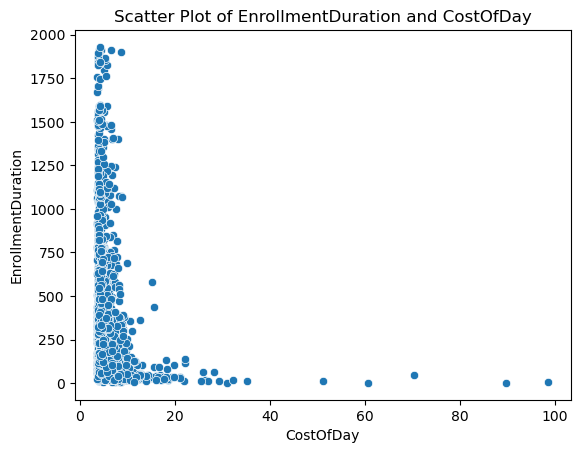

In [211]:
sns.scatterplot(data=df[df['CostOfDay'] > whisker_high[0]], 
                x='CostOfDay', 
                y='EnrollmentDuration')
plt.title('Scatter Plot of EnrollmentDuration and CostOfDay')
plt.show()

In [180]:
df[df['CostOfDay'] > 10][['AllowedWeeklyVisitsBySLA','NumberOfFrequencies', 'CostOfDay', 'EnrollmentDuration', 'LifetimeValue']].describe()

,AllowedWeeklyVisitsBySLA,NumberOfFrequencies,CostOfDay,EnrollmentDuration,LifetimeValue
count,96.000000,96.000000,96.000000,96.000000,96.000000
mean,2.250000,5.750000,18.317591,64.666667,214.863750
std,1.753193,8.746729,14.816198,92.547077,214.230832
min,1.000000,1.000000,10.030682,1.000000,38.600000
25%,1.000000,2.000000,11.125463,21.750000,71.700000
50%,2.000000,3.000000,13.287660,36.000000,103.475000
75%,3.000000,6.000000,18.417747,61.000000,304.800000
max,7.000000,71.000000,98.525000,581.000000,1261.600000


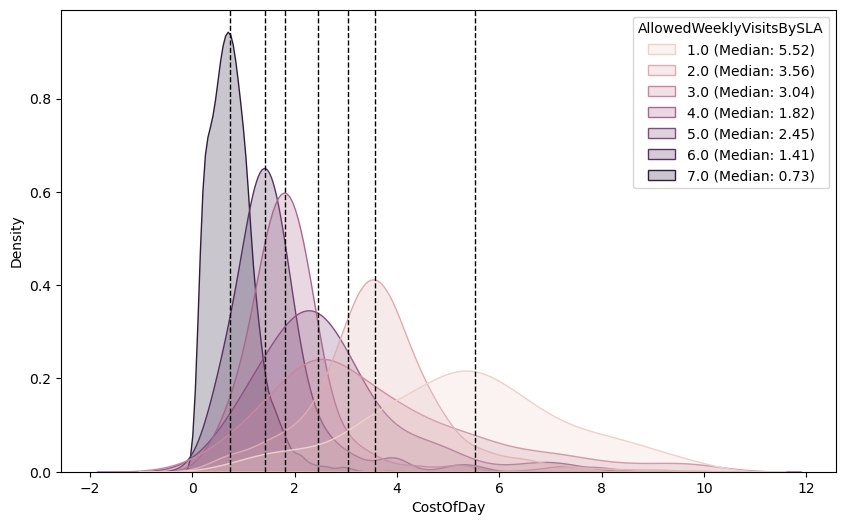

In [207]:
plt.figure(figsize=(10, 6))

sns.kdeplot(data=df[df['CostOfDay'] < 10], x='CostOfDay', hue='AllowedWeeklyVisitsBySLA', fill=True, common_norm=False)


medians = df.groupby('AllowedWeeklyVisitsBySLA')['CostOfDay'].median()
for category, median_value in medians.items():
    plt.axvline(median_value, color='black', linestyle='dashed', linewidth=1, label=f'Median {category}')
handles, labels = plt.gca().get_legend().legend_handles, medians.index

legend_labels = [f'{label} (Median: {medians[label]:.2f})' for label in labels]
plt.legend(handles=handles, labels=legend_labels, title='AllowedWeeklyVisitsBySLA')

plt.show()

The lower amount of visits per week the higher the cost of the day - seems true, since tariffs are normally done this way

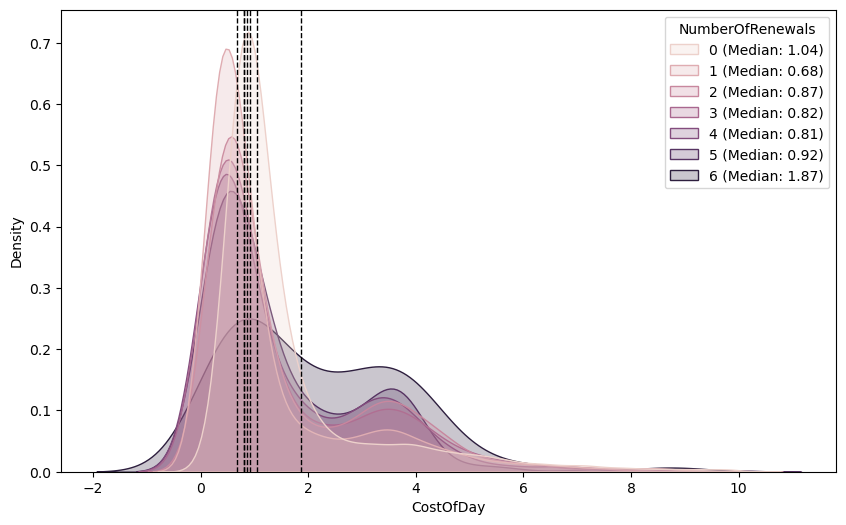

In [209]:
plt.figure(figsize=(10, 6))

sns.kdeplot(data=df[df['CostOfDay'] < 10], x='CostOfDay', hue='NumberOfRenewals', fill=True, common_norm=False)


medians = df.groupby('NumberOfRenewals')['CostOfDay'].median()
for category, median_value in medians.items():
    plt.axvline(median_value, color='black', linestyle='dashed', linewidth=1, label=f'Median {category}')
handles, labels = plt.gca().get_legend().legend_handles, medians.index

legend_labels = [f'{label} (Median: {medians[label]:.2f})' for label in labels]
plt.legend(handles=handles, labels=legend_labels, title='NumberOfRenewals')

plt.show()

We see that these people with extremely high spendings per day are not staying for a long time normally (< 1 year). And those extreme outliers (>10 ) are the ones who stayed just for a few days and come very few times. This is definitely not the target audience

However, some people may stay not the whole period of enrollment but have two or more separate enrollments inside with different lengths and pauses, but we dont have access to this info, so we this is the best approximation we can have (however from the plot above we don't see radical differences in plot shapes and medians of the cost by amount of renewals - meaning that approximation we use is quite good)

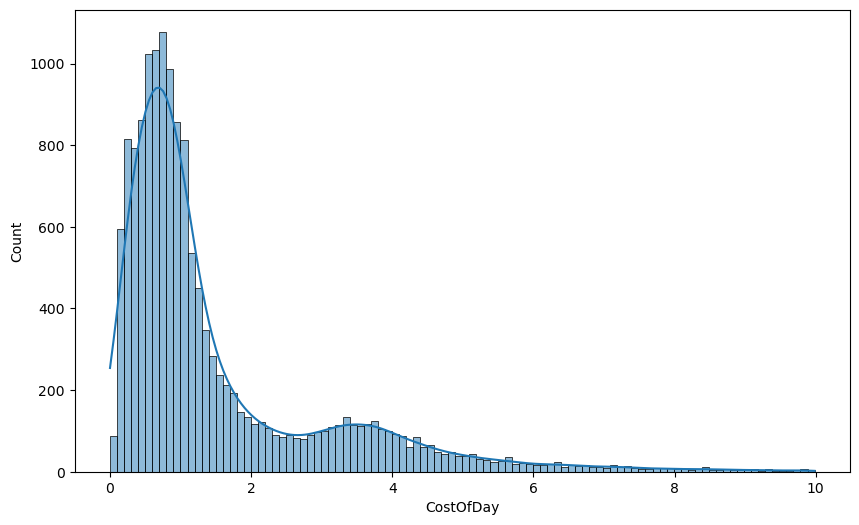

In [203]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df[i] < 10][i], bins=100, kde=True)
plt.show()

#### Cost of visit

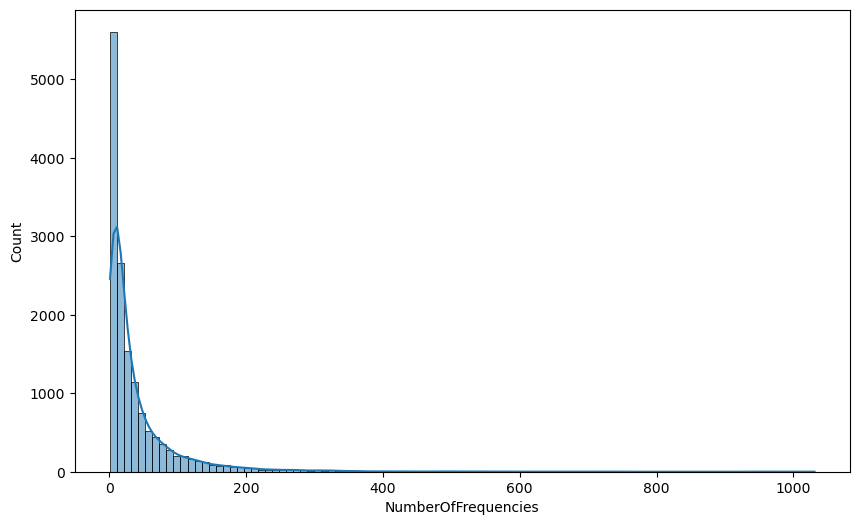

In [127]:
i = 'NumberOfFrequencies'
plt.figure(figsize=(10, 6))
sns.histplot(df[i], bins=100, kde=True)
plt.show()

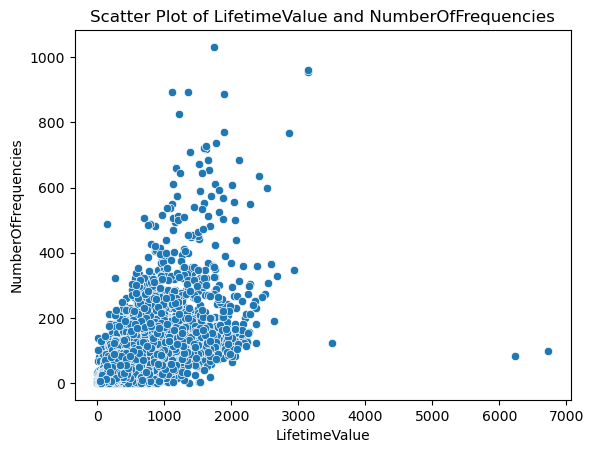

In [213]:
sns.scatterplot(data=df, x='LifetimeValue', y='NumberOfFrequencies')
plt.title('Scatter Plot of LifetimeValue and NumberOfFrequencies')
plt.show()

We also can measure cost of visit per person and check if it is correlated with cost per day - so we can define if there are people how tend to be loyal (have long enrollment period) but they dont really use facilities

In [214]:
df.columns

Index(['ID', 'Age', 'Gender', 'Income', 'EnrollmentStart', 'EnrollmentFinish',
       'LastPeriodStart', 'LastPeriodFinish', 'DateLastVisit',
       'DaysWithoutFrequency', 'LifetimeValue', 'UseByTime',
       'AthleticsActivities', 'WaterActivities', 'FitnessActivities',
       'TeamActivities', 'RacketActivities', 'CombatActivities',
       'SpecialActivities', 'OtherActivities', 'NumberOfFrequencies',
       'AttendedClasses', 'AllowedWeeklyVisitsBySLA',
       'AllowedNumberOfVisitsBySLA', 'RealNumberOfVisits', 'NumberOfRenewals',
       'HasReferences', 'NumberOfReferences', 'Dropout', 'NumberActivities',
       'EnrollmentStartYear', 'EnrollmentDuration', 'LastPeriodDuration',
       'Recency', 'CostOfDay', 'CostOfVisit', 'ClassesPerVisit',
       'LastPeriodVisitingActivity'],
      dtype='object')

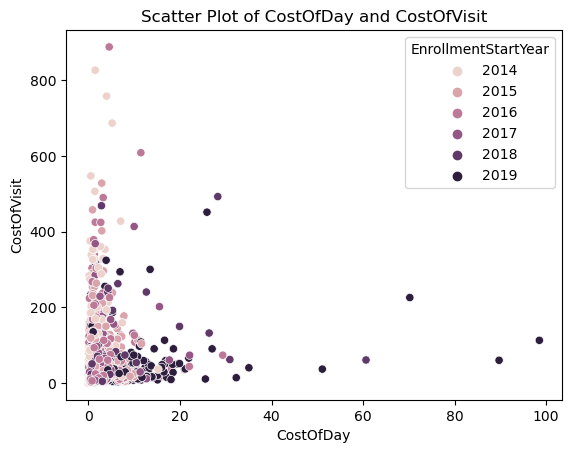

In [215]:
df['CostOfVisit'] = df['LifetimeValue']/(df['NumberOfFrequencies'])

#Let's plot only those who came at least once
sns.scatterplot(data=df[df['NumberOfFrequencies'] > 0], x='CostOfDay', y='CostOfVisit', hue = 'EnrollmentStartYear')
plt.title('Scatter Plot of CostOfDay and CostOfVisit')
plt.show()

We see that there is visible no relation here - that means that even if people stay with us for a long time (so their cost per day is not that big even with large spendings) it doesnt mean that they go to gym during these periods. There are people whose cost of visit is >100 times bigger than the cost of visit of a person who has same cost of day! 

#### Gymlovers and Classlovers

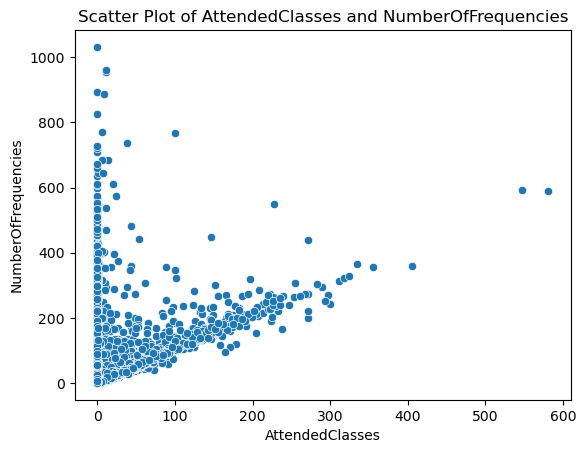

In [216]:
#since there are people that not even came once we will add 1 to number of visits to handle denominator problem
sns.scatterplot(data=df, x='AttendedClasses', y='NumberOfFrequencies')
plt.title('Scatter Plot of AttendedClasses and NumberOfFrequencies')
plt.show()

We see from this chart that there are to groups of people - ones who come for classes and ones who just go to the gym(in the left corner) - that can also help us identify gymlovers and classlovers

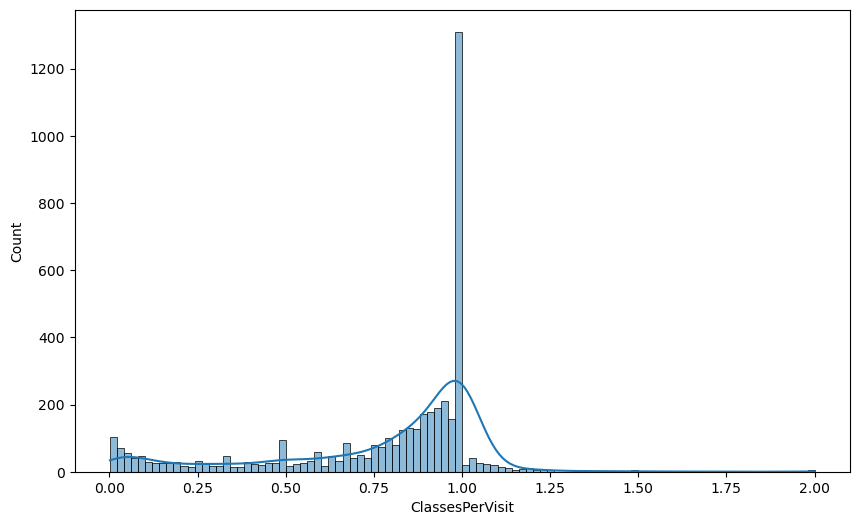

In [217]:
#Let's create a variable which will handle these people

df['ClassesPerVisit'] = df['AttendedClasses']/df['NumberOfFrequencies']

#Plot for those who attended at least one class
i = 'ClassesPerVisit'
plt.figure(figsize=(10, 6))
sns.histplot(df[df['AttendedClasses'] > 0 ][i], bins=100, kde=True)
plt.show()

We see that there are real classgoers - people who come onlt to attend classes or even attend more than 2 classes

#### Last period activity

activity during last months of registration of customers may be an important measure for clusterisation too - so we can do similar analysis of visits but during last two months of it. 

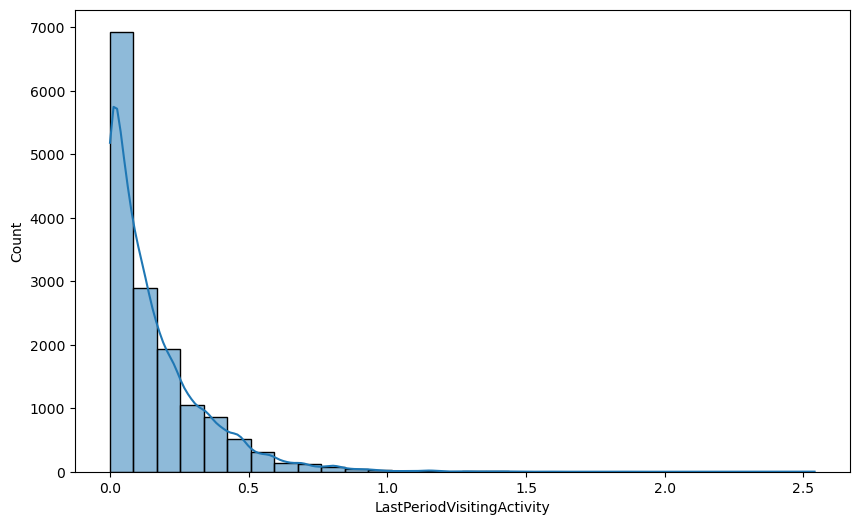

In [218]:
#Let's create this variable since it reflects person's activity better than just number of visits


df['LastPeriodVisitingActivity'] = df['RealNumberOfVisits']/df['AllowedNumberOfVisitsBySLA']

i = 'LastPeriodVisitingActivity'
plt.figure(figsize=(10, 6))
sns.histplot(df[i], bins=30, kde=True)
plt.show()

Numbers close to 0 indicate people who gave up their visit and didn't attend during last months - these might be the guys who always buy membership and then forget about it

#### Correlation matrix and highly correlated variables

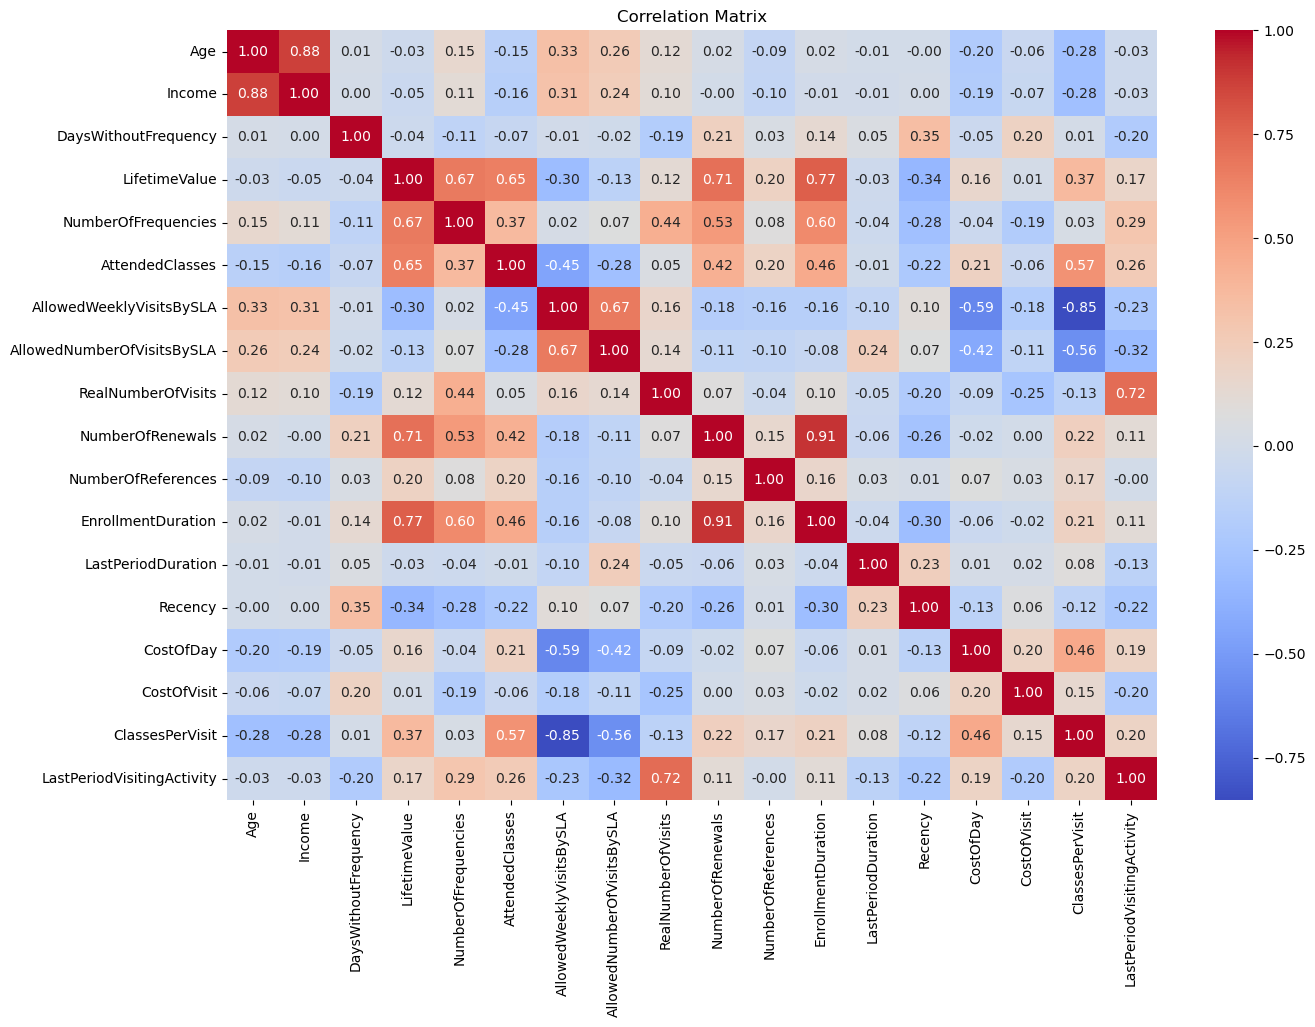

In [220]:
#Let's build correlation matrix with all numeric variables we have
metric_columns = ['Age', 'Income', 'DaysWithoutFrequency', 'LifetimeValue', 'NumberOfFrequencies',
       'AttendedClasses', 'AllowedWeeklyVisitsBySLA',
       'AllowedNumberOfVisitsBySLA', 'RealNumberOfVisits', 'NumberOfRenewals',
       'NumberOfReferences', 
       'EnrollmentDuration', 'LastPeriodDuration', 'Recency', 
       'CostOfDay', 'CostOfVisit', 
       'ClassesPerVisit', 'LastPeriodVisitingActivity']
# Visualize the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(df[metric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

'DaysWithoutFrequency' - it doesnt seems like this variable might reflect any patterns among customers since its just some internal measurement|

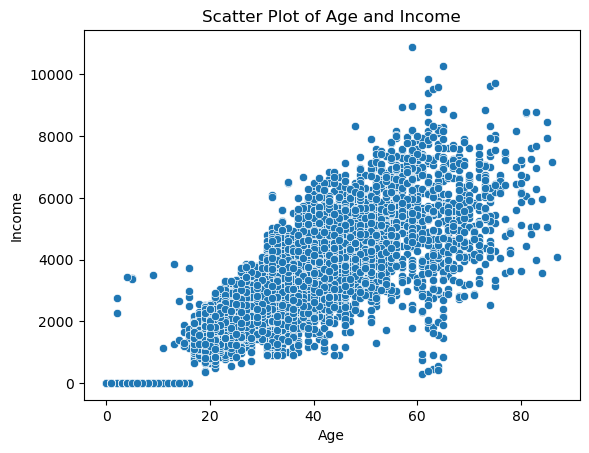

In [221]:
sns.scatterplot(data=df, x='Age', y='Income')
plt.title('Scatter Plot of Age and Income')
plt.show()

There is very strong correlation between age and income, so one of the variables might be redundant. However, age and income might be both important since they handle different aspects of customer portrait

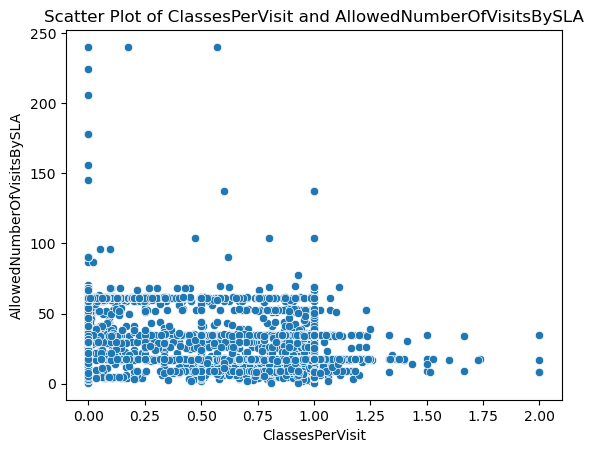

In [222]:
sns.scatterplot(data=df, x='ClassesPerVisit', y='AllowedNumberOfVisitsBySLA')
plt.title('Scatter Plot of ClassesPerVisit and AllowedNumberOfVisitsBySLA')
plt.show()

In case of these two variables there are just some outliers that create weird negative distribution, however, there is no practical sense in this correlation. And we are not going to use AllowedNumberOfVisitsBySLA for clustering since it has nothing to do with client portrait

### Missing values and change of variables

In [227]:
df.isna().sum()/df.shape[0]

ID                            0.000000
Age                           0.000000
Gender                        0.000000
Income                        0.000000
EnrollmentStart               0.000000
EnrollmentFinish              0.000000
LastPeriodStart               0.000000
LastPeriodFinish              0.000000
DateLastVisit                 0.000000
DaysWithoutFrequency          0.000000
LifetimeValue                 0.000000
UseByTime                     0.000000
AthleticsActivities           0.002409
WaterActivities               0.002476
FitnessActivities             0.002342
TeamActivities                0.002342
RacketActivities              0.002476
CombatActivities              0.002209
SpecialActivities             0.002945
OtherActivities               0.002342
NumberOfFrequencies           0.000000
AttendedClasses               0.000000
AllowedWeeklyVisitsBySLA      0.000000
AllowedNumberOfVisitsBySLA    0.000000
RealNumberOfVisits            0.000000
NumberOfRenewals         

In [228]:
df.columns

Index(['ID', 'Age', 'Gender', 'Income', 'EnrollmentStart', 'EnrollmentFinish',
       'LastPeriodStart', 'LastPeriodFinish', 'DateLastVisit',
       'DaysWithoutFrequency', 'LifetimeValue', 'UseByTime',
       'AthleticsActivities', 'WaterActivities', 'FitnessActivities',
       'TeamActivities', 'RacketActivities', 'CombatActivities',
       'SpecialActivities', 'OtherActivities', 'NumberOfFrequencies',
       'AttendedClasses', 'AllowedWeeklyVisitsBySLA',
       'AllowedNumberOfVisitsBySLA', 'RealNumberOfVisits', 'NumberOfRenewals',
       'HasReferences', 'NumberOfReferences', 'Dropout', 'NumberActivities',
       'EnrollmentStartYear', 'EnrollmentDuration', 'LastPeriodDuration',
       'Recency', 'CostOfDay', 'CostOfVisit', 'ClassesPerVisit',
       'LastPeriodVisitingActivity'],
      dtype='object')

very few missing values compared to dataset size, so we can impute them using knn imputer for most cases or simpler techinques

In [229]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

# No we have more metric features that define a person so we will use them
features_for_transform = ['Age', 'Income',  'RealNumberOfVisits', 'NumberOfRenewals',
     'NumberOfReferences', 'NumberOfFrequencies',
       'EnrollmentDuration', 'LastPeriodDuration', 'Recency', 
       'CostOfDay', 'CostOfVisit', 'ClassesPerVisit',
       'LastPeriodVisitingActivity']

df_for_transform = df[features_for_transform]

scaler = MinMaxScaler()
scaled_df_for_transform = scaler.fit_transform(df_for_transform)

imputer = KNNImputer(n_neighbors=15)
imputed_data = pd.DataFrame(imputer.fit_transform(scaled_df_for_transform), columns = features_for_transform)

imputed_data_train = scaler.inverse_transform(imputed_data)

df[features_for_transform] = np.round(imputed_data_train)

df

,ID,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,...,Dropout,NumberActivities,EnrollmentStartYear,EnrollmentDuration,LastPeriodDuration,Recency,CostOfDay,CostOfVisit,ClassesPerVisit,LastPeriodVisitingActivity
0,10000,60.0,Female,5500.0,2019-09-03,2019-10-31,2019-07-01,2019-12-31,2019-10-30,1,...,0,1.0,2019,58.0,183.0,1.0,2.0,10.0,1.0,0.0
1,10001,29.0,Female,2630.0,2014-08-12,2015-09-14,2015-01-01,2015-12-31,2015-07-16,60,...,1,1.0,2014,398.0,364.0,1568.0,1.0,21.0,0.0,0.0
2,10002,23.0,Male,1980.0,2017-05-02,2017-06-01,2017-01-01,2017-06-30,2017-05-25,7,...,1,1.0,2017,30.0,180.0,889.0,1.0,6.0,0.0,0.0
3,10003,9.0,Male,0.0,2018-09-05,2019-02-12,2018-07-01,2019-06-30,2019-01-21,22,...,1,1.0,2018,160.0,364.0,283.0,1.0,8.0,0.0,0.0
4,10004,35.0,Male,4320.0,2016-04-20,2018-06-07,2018-01-01,2018-06-30,2017-11-09,210,...,1,1.0,2016,778.0,180.0,721.0,0.0,9.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14937,24937,14.0,Male,0.0,2016-09-08,2019-10-29,2019-07-01,2019-12-31,2019-10-29,2,...,0,1.0,2016,1146.0,183.0,2.0,1.0,13.0,1.0,0.0
14938,24938,39.0,Male,3529.0,2015-09-17,2016-06-04,2016-01-01,2016-06-30,2016-04-27,38,...,1,1.0,2015,261.0,181.0,1282.0,1.0,6.0,0.0,0.0
14939,24939,20.0,Male,1810.0,2017-03-01,2017-03-31,2017-01-01,2017-06-30,2017-03-29,2,...,1,1.0,2017,30.0,180.0,946.0,1.0,7.0,0.0,0.0
14940,24940,55.0,Male,4800.0,2018-03-01,2019-10-28,2019-07-01,2019-12-31,2019-10-28,3,...,0,1.0,2018,606.0,183.0,3.0,1.0,4.0,1.0,0.0


In [230]:
#recalculate some features that were dependant on columns with missing values

df['CostOfDay'] = df['LifetimeValue']/df['EnrollmentDuration']
df['CostOfVisit'] = df['LifetimeValue']/(df['NumberOfFrequencies'])
df['ClassesPerVisit'] = df['AttendedClasses']/df['NumberOfFrequencies']

In [231]:
#fillna in binaries with mode
df[['AthleticsActivities', 'WaterActivities', 'FitnessActivities',
       'TeamActivities', 'RacketActivities', 'CombatActivities',
       'SpecialActivities', 'OtherActivities']] = df[['AthleticsActivities', 'WaterActivities', 'FitnessActivities',
       'TeamActivities', 'RacketActivities', 'CombatActivities',
       'SpecialActivities', 'OtherActivities']].apply(lambda x: x.fillna(x.mode()[0]))

In [232]:
df.isna().sum()/df.shape[0]

ID                            0.000000
Age                           0.000000
Gender                        0.000000
Income                        0.000000
EnrollmentStart               0.000000
EnrollmentFinish              0.000000
LastPeriodStart               0.000000
LastPeriodFinish              0.000000
DateLastVisit                 0.000000
DaysWithoutFrequency          0.000000
LifetimeValue                 0.000000
UseByTime                     0.000000
AthleticsActivities           0.000000
WaterActivities               0.000000
FitnessActivities             0.000000
TeamActivities                0.000000
RacketActivities              0.000000
CombatActivities              0.000000
SpecialActivities             0.000000
OtherActivities               0.000000
NumberOfFrequencies           0.000000
AttendedClasses               0.000000
AllowedWeeklyVisitsBySLA      0.000000
AllowedNumberOfVisitsBySLA    0.000000
RealNumberOfVisits            0.000000
NumberOfRenewals         

### EDA

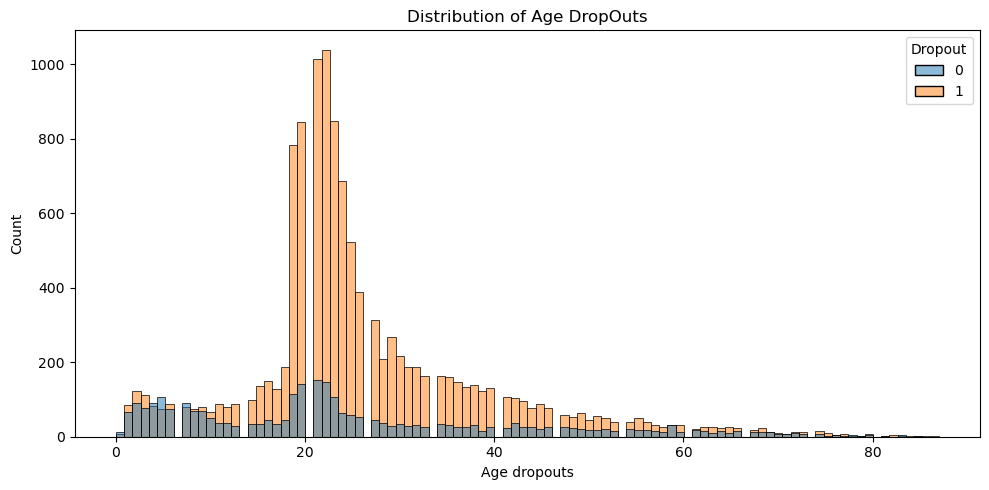

In [125]:
fig, axes = plt.subplots(1, 1, figsize=(10,5))

sns.histplot(data=df, x='Age', bins=100, hue = 'Dropout')
plt.title('Distribution of Age DropOuts')
plt.xlabel('Age dropouts')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [126]:
ages = []
for i in range(0, len(df)):
    ages.append(int(df['Age'].iloc[i] - df['EnrollmentDuration'].iloc[i]/360))
df['AgeStart'] = ages

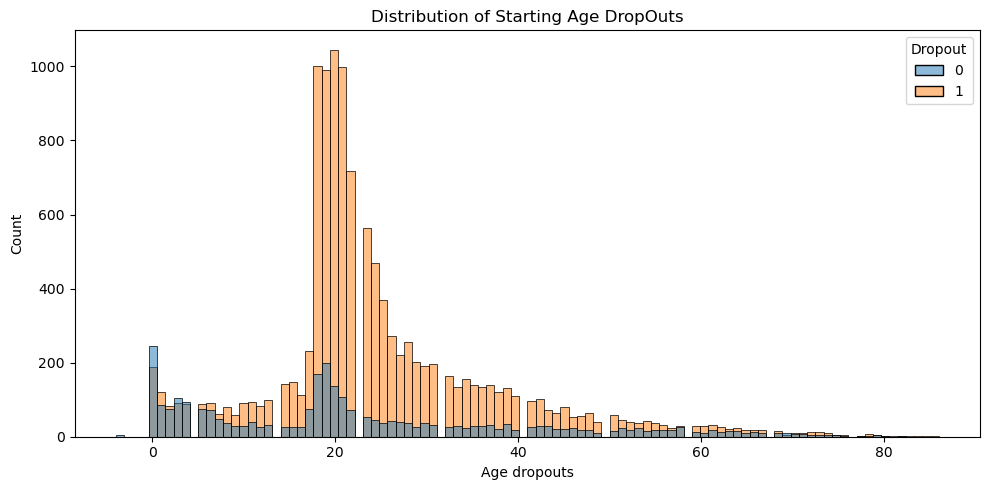

In [127]:
fig, axes = plt.subplots(1, 1, figsize=(10,5))

sns.histplot(data=df, x='AgeStart', bins=100, hue = 'Dropout')
plt.title('Distribution of Starting Age DropOuts')
plt.xlabel('Age dropouts')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

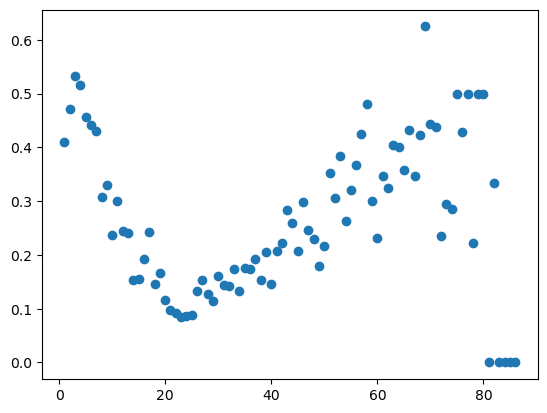

In [128]:
colors = sns.color_palette('pastel')[0:5]
df = df.loc[df['AgeStart']>0]
ageStart = df['AgeStart'].unique()
df.loc[df['Dropout']==0]
countAge=[]
for i in ageStart:
    countAge.append(len(df.loc[(df['AgeStart']==i )& (df['Dropout']==0)])/len(df.loc[(df['AgeStart']==i)]))
#create pie chart
plt.scatter(x=ageStart, y = countAge)

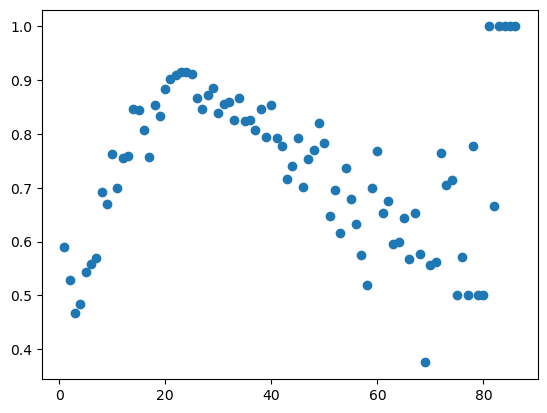

In [129]:
colors = sns.color_palette('pastel')[0:5]
df = df.loc[df['AgeStart']>0]
ageStart = df['AgeStart'].unique()
df.loc[df['Dropout']==0]
countAge=[]
for i in ageStart:
    countAge.append(len(df.loc[(df['AgeStart']==i )& (df['Dropout']==1)])/len(df.loc[(df['AgeStart']==i)]))
#create pie chart
plt.scatter(x=ageStart, y = countAge)

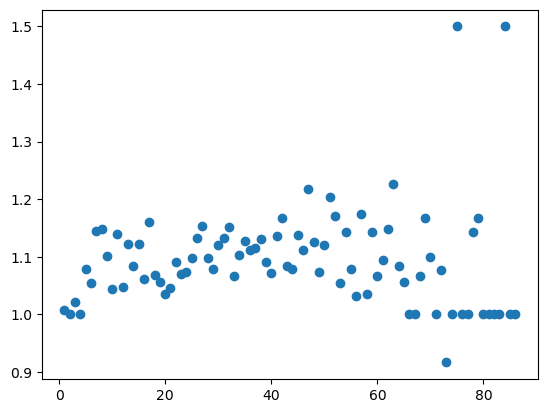

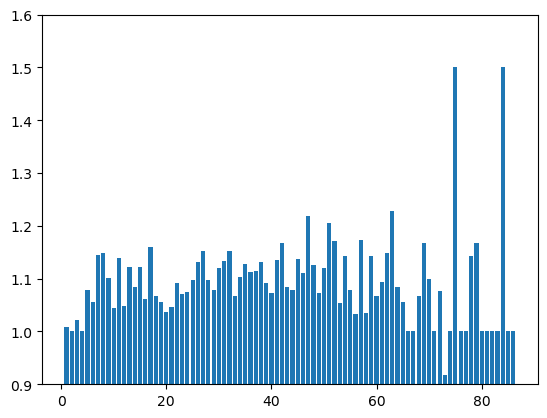

In [130]:
colors = sns.color_palette('pastel')[0:5]
df = df.loc[df['AgeStart']>0]
ageStart = df['AgeStart'].unique()
df.loc[df['Dropout']==0]
Activities=[]
for i in ageStart:
    Activities.append(df['NumberActivities'].loc[(df['AgeStart']==i )& (df['Dropout']==1)].mean())
    
plt.scatter(x=ageStart, y = Activities)
plt.show()
plt.bar(x=ageStart, height = Activities)
plt.ylim(0.9, 1.6)
plt.show()
    

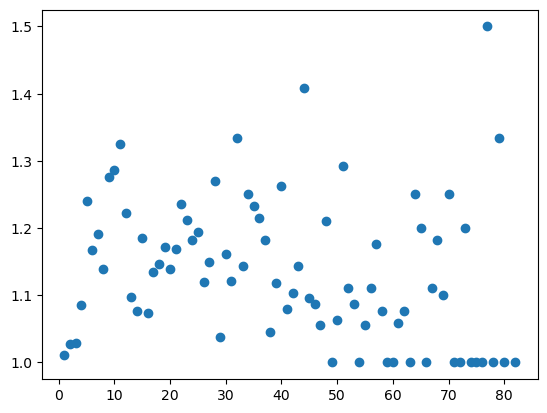

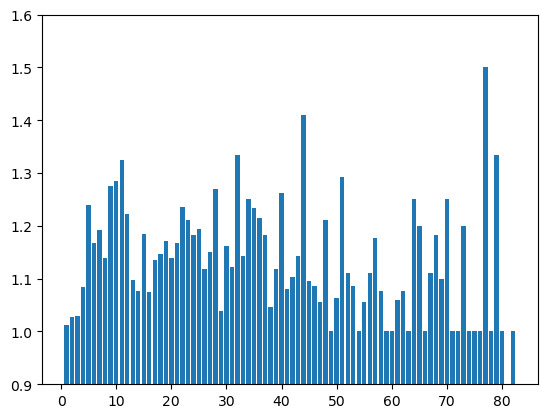

In [131]:
colors = sns.color_palette('pastel')[0:5]
df = df.loc[df['AgeStart']>0]
ageStart = df['AgeStart'].unique()
df.loc[df['Dropout']==0]
Activities=[]
for i in ageStart:
    Activities.append(df['NumberActivities'].loc[(df['AgeStart']==i )& (df['Dropout']==0)].mean())
    
plt.scatter(x=ageStart, y = Activities)
plt.show()
plt.bar(x=ageStart, height = Activities)
plt.ylim(0.9, 1.6)
plt.show()
    

### Outliers

In [170]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

df_clustering = df[['Age', 'Income',  'RealNumberOfVisits', 'NumberOfRenewals',
     'NumberOfReferences', 'NumberOfFrequencies',
       'EnrollmentDuration', 'LastPeriodDuration', 'Recency', 
       'CostOfDay', 'CostOfVisit', 'ClassesPerVisit',
       'LastPeriodVisitingActivity']]

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_clustering)

epsilon = 0.3
min_samples = 5  
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
df_clustering['Cluster'] = dbscan.fit_predict(df_scaled)

# Identify outliers (points with cluster label -1)
outliers = df_clustering[df_clustering['Cluster'] == -1]

pd.Series(dbscan.labels_).value_counts()

# # Plot the results
# plt.scatter(df['Feature1'], df['Feature2'], c=df['Cluster'], cmap='viridis')
# plt.scatter(outliers['Feature1'], outliers['Feature2'], color='red', label='Outliers')
# plt.xlabel('Feature1')
# plt.ylabel('Feature2')
# plt.title('DBSCAN Outlier Detection')
# plt.legend()
# plt.show()

/var/folders/kk/jn6jnrpj6_30s05tyyfmmk9h0000gn/T/ipykernel_60896/2862268738.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clustering['Cluster'] = dbscan.fit_predict(df_scaled)


 0    8480
 1    4907
 4     489
-1     234
 5     191
 6      79
 3      63
 2      49
 9       5
 7       4
 8       4
dtype: int64

In [171]:
outliers

,Age,Income,RealNumberOfVisits,NumberOfRenewals,NumberOfReferences,NumberOfFrequencies,EnrollmentDuration,LastPeriodDuration,Recency,CostOfDay,CostOfVisit,ClassesPerVisit,LastPeriodVisitingActivity,Cluster
223,51.0,5640.0,3.0,5.0,0.0,138.0,1836.0,364.0,41.0,0.652832,8.685507,0.971014,0.0,-1
260,28.0,2560.0,0.0,3.0,1.0,291.0,1170.0,183.0,458.0,0.716709,2.881615,0.000000,0.0,-1
262,19.0,1160.0,4.0,4.0,1.0,590.0,1462.0,183.0,92.0,1.044337,2.587831,0.984746,0.0,-1
299,53.0,4750.0,0.0,1.0,1.0,1.0,256.0,180.0,1755.0,0.463281,118.600000,0.000000,0.0,-1
354,48.0,4390.0,34.0,3.0,0.0,214.0,1144.0,364.0,0.0,0.385752,2.062150,0.000000,1.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14539,11.0,615.0,14.0,4.0,0.0,232.0,1483.0,183.0,6.0,0.927040,5.925862,0.573276,2.0,-1
14638,25.0,2670.0,0.0,4.0,0.0,6.0,1603.0,364.0,1836.0,0.096195,25.700000,0.000000,0.0,-1
14700,10.0,0.0,5.0,4.0,0.0,21.0,182.0,365.0,1214.0,3.843681,33.311905,0.952381,0.0,-1
14832,44.0,4020.0,0.0,3.0,1.0,93.0,1120.0,183.0,591.0,0.807589,9.725806,0.774194,0.0,-1


### Scaling 

### EDA after all transformations and variables selection

## Clusterisation